# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [52]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [53]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 577


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [54]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&appid={weather_api_key}&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
     # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")   

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hawaiian paradise park
Processing Record 2 of Set 1 | bethel
Processing Record 3 of Set 1 | kodiak
Processing Record 4 of Set 1 | edinburgh of the seven seas
Processing Record 5 of Set 1 | tadine
Processing Record 6 of Set 1 | port-aux-francais
Processing Record 7 of Set 1 | taiohae
City not found. Skipping...
Processing Record 8 of Set 1 | blackmans bay
Processing Record 9 of Set 1 | vadso
Processing Record 10 of Set 1 | iqaluit
Processing Record 11 of Set 1 | albany
Processing Record 12 of Set 1 | steinbach
Processing Record 13 of Set 1 | atafu village
Processing Record 14 of Set 1 | tiksi
Processing Record 15 of Set 1 | yeraliyev
Processing Record 16 of Set 1 | lebu
Processing Record 17 of Set 1 | guerrero negro
Processing Record 18 of Set 1 | opuwo
Processing Record 19 of Set 1 | san antonio del estrecho
City not found. Skipping...
Processing Record 20 of Set 1 | oodweyne
Processing Record 21

Processing Record 40 of Set 4 | bao loc
City not found. Skipping...
Processing Record 41 of Set 4 | laikit, laikit ii (dimembe)
Processing Record 42 of Set 4 | serov
Processing Record 43 of Set 4 | georgetown
Processing Record 44 of Set 4 | tranovaho
City not found. Skipping...
Processing Record 45 of Set 4 | desaguadero
Processing Record 46 of Set 4 | ganghwa-gun
Processing Record 47 of Set 4 | bokoro
Processing Record 48 of Set 4 | remire-montjoly
Processing Record 49 of Set 4 | novyy urgal
Processing Record 0 of Set 5 | urangan
Processing Record 1 of Set 5 | mount isa
Processing Record 2 of Set 5 | alesund
Processing Record 3 of Set 5 | omachi
Processing Record 4 of Set 5 | lexington
Processing Record 5 of Set 5 | cairns city
City not found. Skipping...
Processing Record 6 of Set 5 | bandarbeyla
Processing Record 7 of Set 5 | cable beach
City not found. Skipping...
Processing Record 8 of Set 5 | saint-pierre
Processing Record 9 of Set 5 | airuk
Processing Record 10 of Set 5 | westpo

Processing Record 30 of Set 8 | pangody
Processing Record 31 of Set 8 | san andros
City not found. Skipping...
Processing Record 32 of Set 8 | nova sintra
Processing Record 33 of Set 8 | happy valley-goose bay
Processing Record 34 of Set 8 | gandorhun
Processing Record 35 of Set 8 | novodvinsk
Processing Record 36 of Set 8 | satoraljaujhely
Processing Record 37 of Set 8 | urengoy
Processing Record 38 of Set 8 | acapulco de juarez
Processing Record 39 of Set 8 | deulgaon raja
Processing Record 40 of Set 8 | talisayan
Processing Record 41 of Set 8 | pacasmayo
Processing Record 42 of Set 8 | holmen
Processing Record 43 of Set 8 | pante makasar
City not found. Skipping...
Processing Record 44 of Set 8 | port isabel
Processing Record 45 of Set 8 | rovaniemi
Processing Record 46 of Set 8 | kirensk
Processing Record 47 of Set 8 | slave lake
Processing Record 48 of Set 8 | bayport
Processing Record 49 of Set 8 | chrysoupolis
Processing Record 0 of Set 9 | cidreira
Processing Record 1 of Set 9 

City not found. Skipping...
Processing Record 21 of Set 12 | anna regina
Processing Record 22 of Set 12 | portland
Processing Record 23 of Set 12 | mulanje
Processing Record 24 of Set 12 | mabaruma
Processing Record 25 of Set 12 | debesy
Processing Record 26 of Set 12 | praia da vitoria
-----------------------------
Data Retrieval Complete      
-----------------------------


In [55]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          549
Lat           549
Lng           549
Max Temp      549
Humidity      549
Cloudiness    549
Wind Speed    549
Country       549
Date          549
dtype: int64

In [56]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,hawaiian paradise park,19.5933,-154.9731,23.91,94,100,2.06,US,1684557809
1,bethel,41.3712,-73.4140,12.74,87,0,2.06,US,1684557810
2,kodiak,57.7900,-152.4072,6.73,93,100,6.69,US,1684557810
3,edinburgh of the seven seas,-37.0676,-12.3116,17.22,97,96,8.21,SH,1684557810
4,tadine,-21.5500,167.8833,23.14,55,23,5.06,NC,1684557810


In [58]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [59]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hawaiian paradise park,19.5933,-154.9731,23.91,94,100,2.06,US,1684557809
1,bethel,41.3712,-73.4140,12.74,87,0,2.06,US,1684557810
2,kodiak,57.7900,-152.4072,6.73,93,100,6.69,US,1684557810
3,edinburgh of the seven seas,-37.0676,-12.3116,17.22,97,96,8.21,SH,1684557810
4,tadine,-21.5500,167.8833,23.14,55,23,5.06,NC,1684557810


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

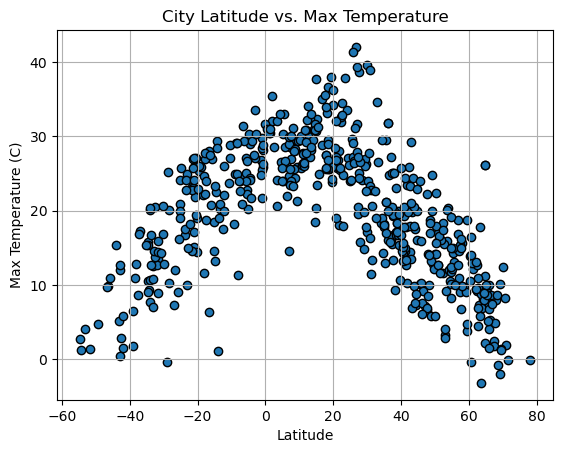

In [61]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"],city_data_df["Max Temp"],marker="o",edgecolor="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

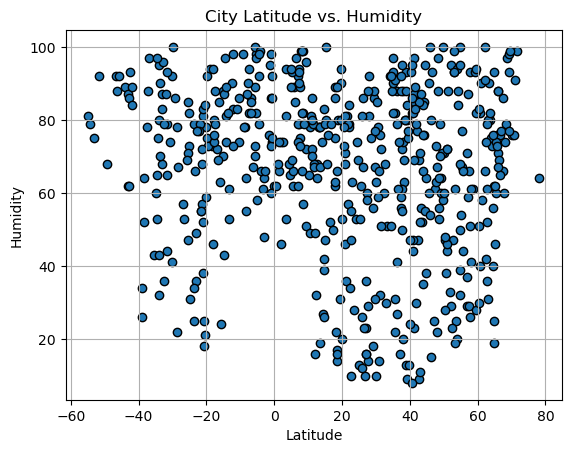

In [64]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"],city_data_df["Humidity"],marker="o",edgecolor="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid()


# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

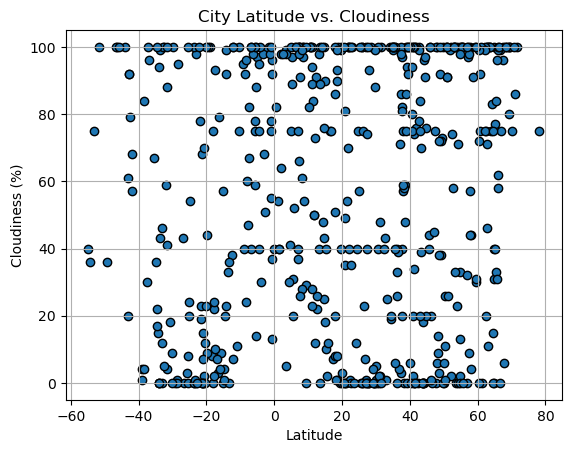

In [65]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"],city_data_df["Cloudiness"],marker="o",edgecolor="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

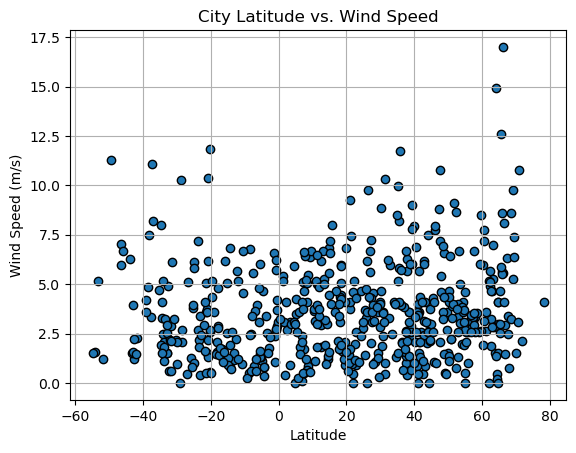

In [66]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"],city_data_df["Wind Speed"],marker="o",edgecolor="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [73]:
# Define a function to create Linear Regression plots
def linear_reg(x_values,y_values,eq_position):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    print(f"The r-value is: {rvalue}")
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,eq_position,fontsize=15,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(f'{y_values.name}')
    plt.show()

In [74]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hawaiian paradise park,19.5933,-154.9731,23.91,94,100,2.06,US,1684557809
1,bethel,41.3712,-73.4140,12.74,87,0,2.06,US,1684557810
2,kodiak,57.7900,-152.4072,6.73,93,100,6.69,US,1684557810
7,vadso,70.0744,29.7487,12.49,76,75,1.54,NO,1684557811
8,iqaluit,63.7506,-68.5145,-3.15,80,100,1.54,CA,1684557811


In [75]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,edinburgh of the seven seas,-37.0676,-12.3116,17.22,97,96,8.21,SH,1684557810
4,tadine,-21.5500,167.8833,23.14,55,23,5.06,NC,1684557810
5,port-aux-francais,-49.3500,70.2167,4.82,68,36,11.27,TF,1684557810
6,blackmans bay,-43.0167,147.3167,12.07,62,61,3.93,AU,1684557811
11,atafu village,-8.5421,-172.5159,29.11,78,92,6.80,TK,1684557812


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8031137725366336


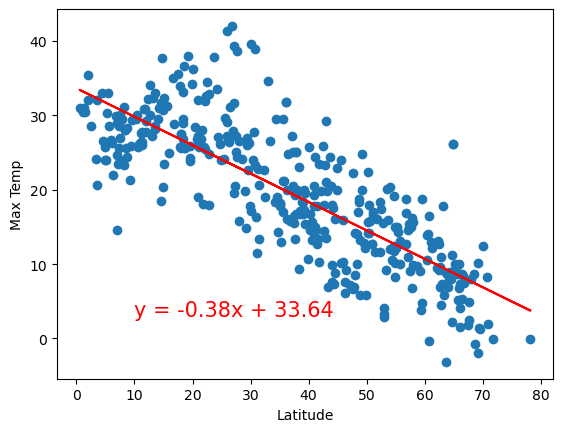

In [83]:
# Linear regression on Northern Hemisphere
linear_reg(northern_hemi_df["Lat"],northern_hemi_df["Max Temp"],(10,3))

The r-value is: 0.7707602512035006


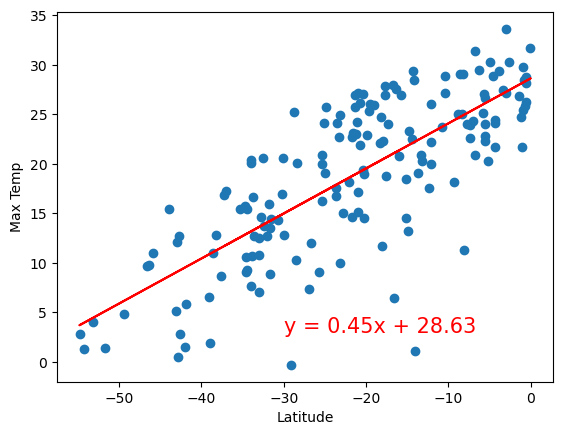

In [107]:
# Linear regression on Southern Hemisphere
linear_reg(southern_hemi_df["Lat"],southern_hemi_df["Max Temp"],(-30,3))

**Discussion about the linear relationship:** 
The correlation between the latitude and the max temperature in northern hemisphere is negative, whereas in southern hemisphere is positive. In addition, according to the distribution of points shown in the graph, the linear regression model of northern hemisphere captures the variation in the data more efficiently. As most of the observed data are closely clustered around with the estimated regression line.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: -0.010472623215018581


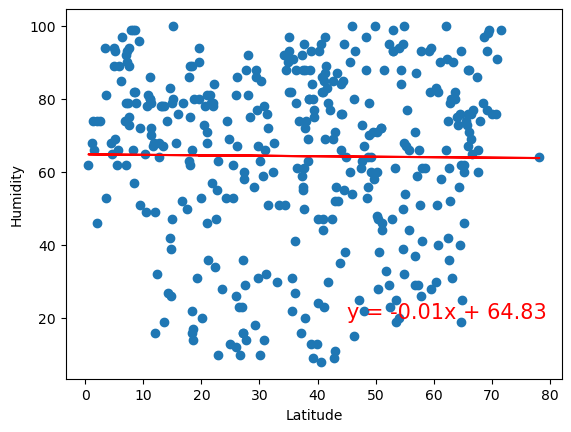

In [108]:
# Northern Hemisphere
linear_reg(northern_hemi_df["Lat"],northern_hemi_df["Humidity"],(45,20))

The r-value is: 0.09737605155591213


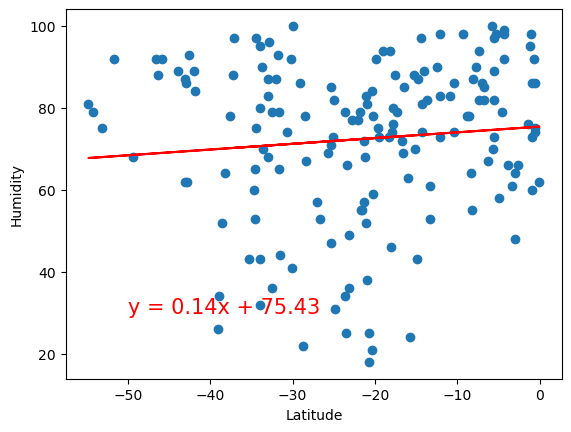

In [109]:
# Southern Hemisphere
linear_reg(southern_hemi_df["Lat"],southern_hemi_df["Humidity"],(-50,30))

**Discussion about the linear relationship:** There is a negative correlation between the latitude and humidity in northern hemisphere. On the other side, the correlation between the latitude and humidity in southern hemisphere is positive. However, the r-value of either northern(-0.01) and southern(0.10) hemisphere indicate that the correlations are very weak.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.05915773523185


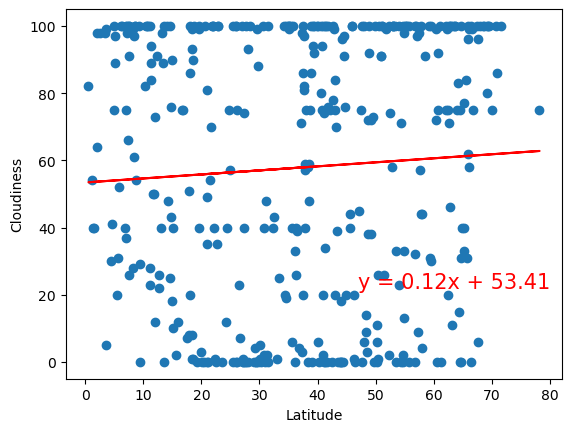

In [110]:
# Northern Hemisphere
linear_reg(northern_hemi_df["Lat"],northern_hemi_df["Cloudiness"],(47,22))

The r-value is: 0.11705491280321924


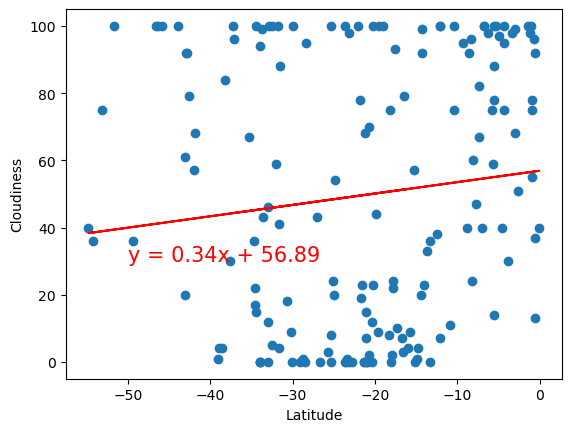

In [111]:
# Southern Hemisphere
linear_reg(southern_hemi_df["Lat"],southern_hemi_df["Cloudiness"],(-50,30))

**Discussion about the linear relationship:** Based on the postive slopes of both regression models, although the northen(0.12) and southern(0.34) hemisphere have the positive correlations between the latitude and the cloudiness, most of observed data points exhibit considerable dispersion from the regression line. In other words, the linear regression model does not fit to the data very well due to those influential points (when cloudiness equal to 0 or 100).

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.1291839779292159


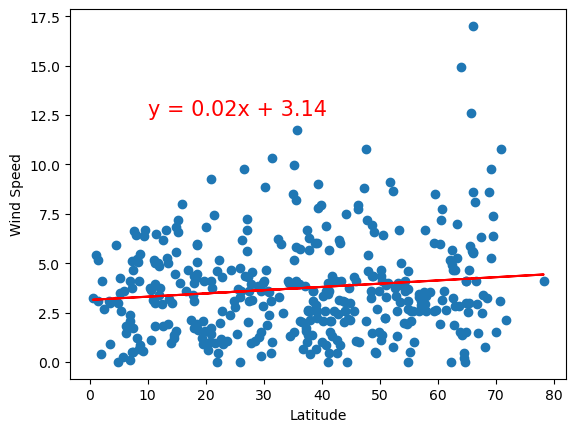

In [106]:
# Northern Hemisphere
linear_reg(northern_hemi_df["Lat"],northern_hemi_df["Wind Speed"],(10,12.5))

The r-value is: -0.15940877116937638


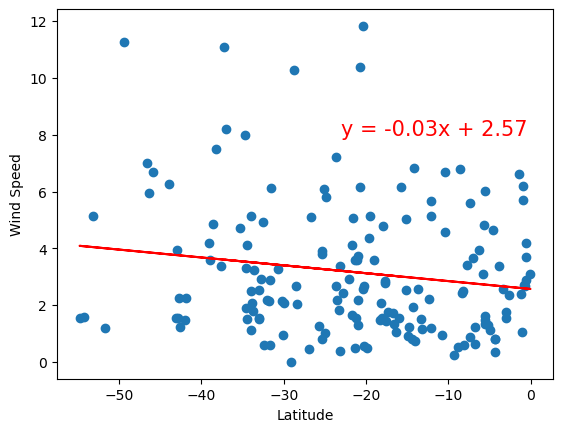

In [105]:
# Southern Hemisphere
linear_reg(southern_hemi_df["Lat"],southern_hemi_df["Wind Speed"],(-23,8))

**Discussion about the linear relationship:** The r-value of latitude and wind speed for both northern (0.13) and southern (-0.16) hemisphere are close to zero.It suggests that there is no apparent linear relationship between latitude and wind speed.